*  Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

### Let's take an example of gmail

#### Training
* On marking mail as spam
* model tries to find the probability of mail becoming a spam for each word

#### Prediction
* When a new mail arrives
* Using probability for each word in the mail, it finds out the cumulative probability of the entire mail becomeing a spam or not


* Gaussian Naive Bayes
* Simpliest Naive Bayes

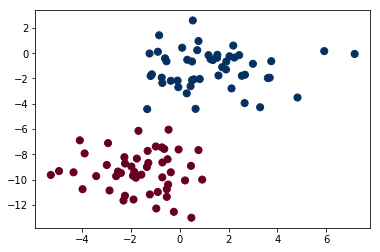

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
#100 - total number of data points
#2 - total number of features or number of cols.
#centers (2) - 
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [8]:
X
# y

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [9]:

import numpy as np
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

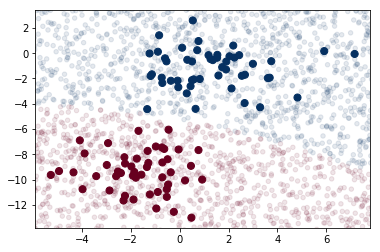

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#Testing with new dataset
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


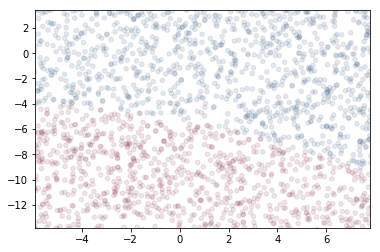

In [23]:
#Testing with new dataset
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [26]:

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [35]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [37]:
test.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#MultinomialNB - More than 2 classes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [41]:
#model is a pipeline, doing fit on it causes all data to be subjected to tranformation & evaluation
model.fit(train.data, train.target)

labels = model.predict(test.data)

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

In [46]:
mat

array([[371,  11,   2,   5],
       [ 11, 377,   5,   1],
       [  5,   4, 379,  10],
       [  5,  11,  49, 186]])

confusion_matrix
* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

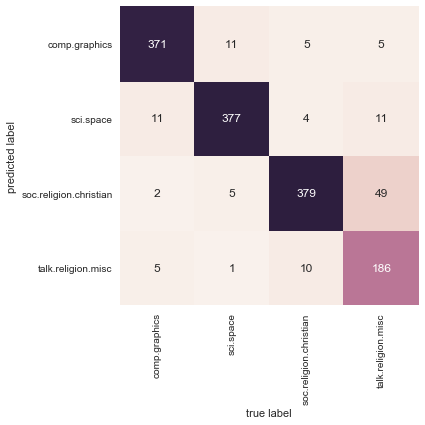

In [50]:

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [52]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [54]:
predict_category('rocket going to mars')

'sci.space'

In [56]:
predict_category("jes's")

'soc.religion.christian'

In [58]:

predict_category('rama save us')

'talk.religion.misc'

In [59]:
predict_category('curve of mary cup')

'soc.religion.christian'

### When to use Naive Bayes
* Extreamly fast for both training & prediction
* Very few tunable params
* Provides probalistic solution